## Assignment 11  

### Clustering 

In [1]:
# if needed install python packages via the following commands
# !pip install fastcluster

In [2]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
import fastcluster
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt 
import seaborn as sns 

Artificial datasets will be used. The ground truth shall be considered known.

In [3]:
blobs_data = datasets.make_blobs(n_samples=400,
                                 n_features=2, 
                                 centers=3,
                                 center_box=(-7,7),
                                 cluster_std=0.8,
                                 random_state=613
                                 )
                                
moons_data = datasets.make_moons(n_samples=400,
                                 noise=0.1,
                                 random_state=613
                                 )

circles_data = datasets.make_circles(n_samples=400,
                                     noise=0.05,
                                     factor=0.7,
                                     random_state=613
                                     )

varied_blobs_data = datasets.make_blobs(n_samples=400,
                                        n_features=2,
                                        centers=3,
                                        center_box=(-7,7),
                                        cluster_std=[0.6, 1.5, 2.5],
                                        random_state=613
                                        )

transformation = [[0.5, -1], [-0.2, 1]]
aniso_data = (np.dot(blobs_data[0], transformation), blobs_data[1])

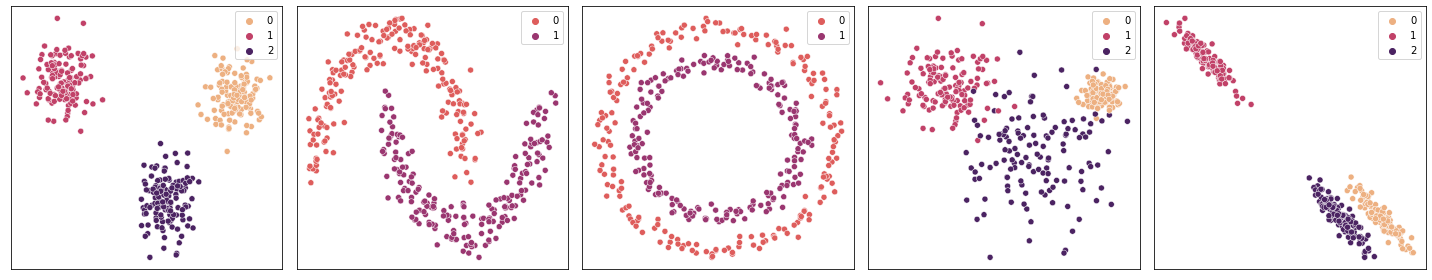

In [4]:
plt.figure(figsize=(20,4))
for n, data in zip(range(1,6), [blobs_data, moons_data, circles_data, varied_blobs_data, aniso_data]):
    X, y = data[0], data[1]
    df = pd.DataFrame(data={f'predictor_{n}1': X[:,0],
                            f'predictor_{n}2': X[:,1],
                            f'cluster_{n}': y})
    if n==1:
        data_df = df
    else:
        data_df = pd.concat([data_df, df], axis=1)

    # plot the datasets
    plt.subplot(1,5,n)
    sns.scatterplot(x=f'predictor_{n}1', y=f'predictor_{n}2', hue=f'cluster_{n}', data=df, palette='flare')
    plt.legend(loc='upper right')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()

### Agglomerative clustering

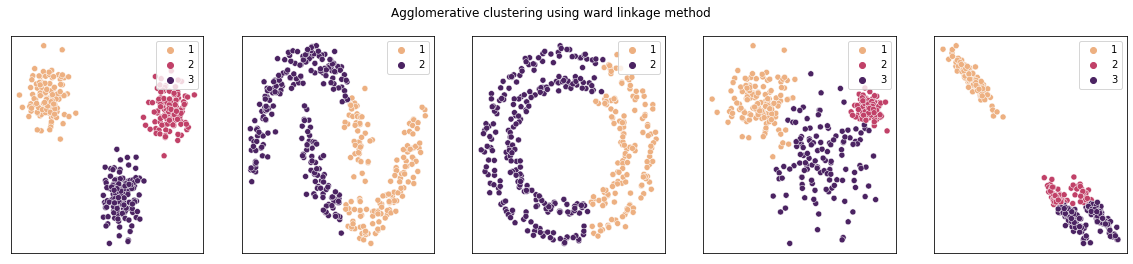

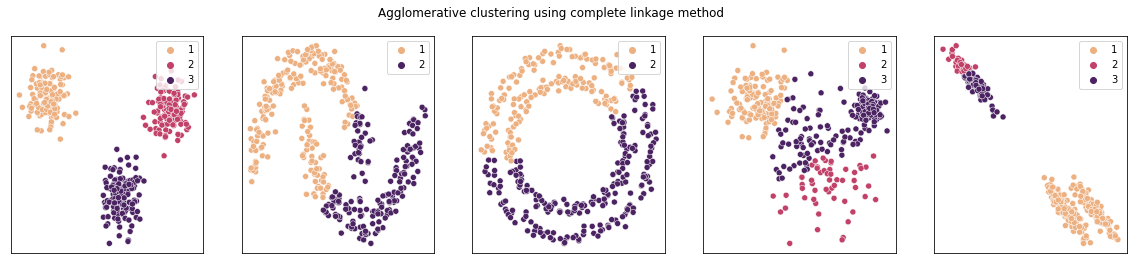

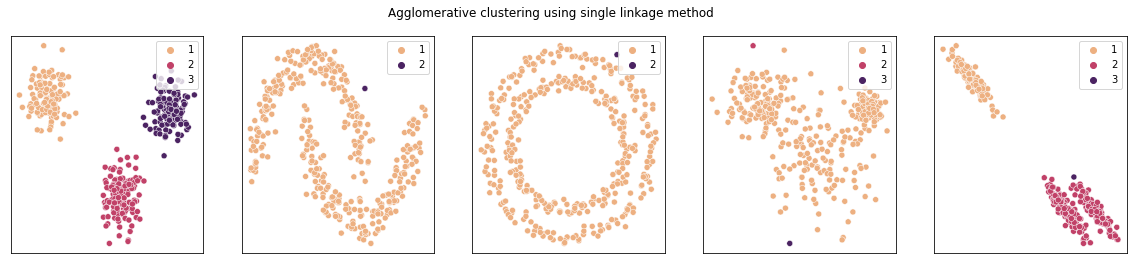

In [5]:
for linkage_method in ['ward', 'complete', 'single']:
    plt.figure(figsize=(20,4))
    plt.suptitle(f'Agglomerative clustering using {linkage_method} linkage method')
    for n in range(1,6):
        clust = fastcluster.linkage(data_df[[f'predictor_{n}1', f'predictor_{n}2']].to_numpy(), method=linkage_method, metric='euclidean')
        if n in [1,4,5]:
            k=3
        else:
            k=2
        
        clust_member = fcluster(clust, k, criterion='maxclust')

        plt.subplot(1,5,n)
        sns.scatterplot(x=f'predictor_{n}1', y=f'predictor_{n}2', hue=clust_member, data=data_df, palette='flare')
        plt.legend(loc='upper right')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('')
        plt.ylabel('')
    plt.show()

Resources:
* Fastcluster [link](http://danifold.net/fastcluster.html)
* scikit-learn [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)